## 문제 1

위스콘신 유방암 데이터셋과 타이타닉 탑승자 데이터 셋을 KNN 알고리즘으로 분류분석을 수행하고 로지스틱의 경우와 결과를 비교하시오

각 데이터셋에 어떤 알고리즘을 적용하는 것이 더 좋은 성능을 기대할 수 있는지 결론을 ㄴ ㅐ시오.

> 단, 전처리 과정은 이전 수업과 동일하게 진행

### [1] 패키지 가져오기

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *
from helper.re import *

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### [2] 위스콘신 유방암 데이터 가져오기

In [3]:
origin1 = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"],info = False)

#### (1) 이전과 동일한 전처리

In [4]:
df1 = my_labelling(origin1,'diagnosis')

#### (2) 데이터 분할

In [5]:
x_train1, x_test1, y_train1, y_test1 = my_train_test_split(df1, 'diagnosis')
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((455, 30), (114, 30), (455,), (114,))

#### (3) KNN분류 알고리즘 적용

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  8 | manhattan |             5 | uniform   |          0.938462 |
| 10 | manhattan |             7 | uniform   |          0.938462 |
| 11 | manhattan |             7 | distance  |          0.936264 |
|  9 | manhattan |             5 | distance  |           0.92967 |
|  4 | euclidean |             7 | uniform   |          0.927473 |
|  2 | euclidean |             5 | uniform   |          0.925275 |
|  5 | euclidean |             7 | distance  |          0.920879 |
|  6 | manhattan |             3 | uniform   |          0.920879 |
|  3 | euclidean |             5 | distance  |          0.918681 |
|  7 | manhattan |             3 | distance  |          0.918681 |
|  0 | euclidean |             3 | uniform   |          0.914286 |
|  1 | euclidean |             3 | distance  |         

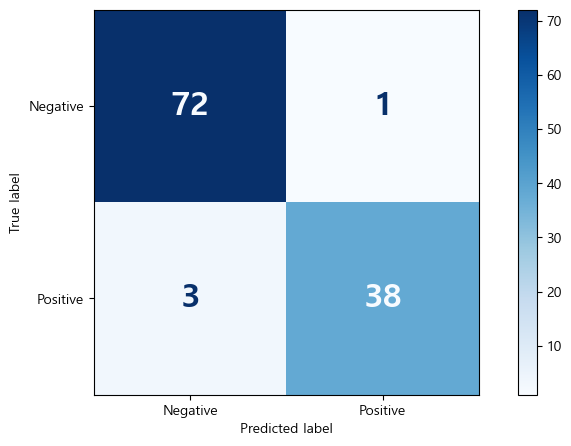


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


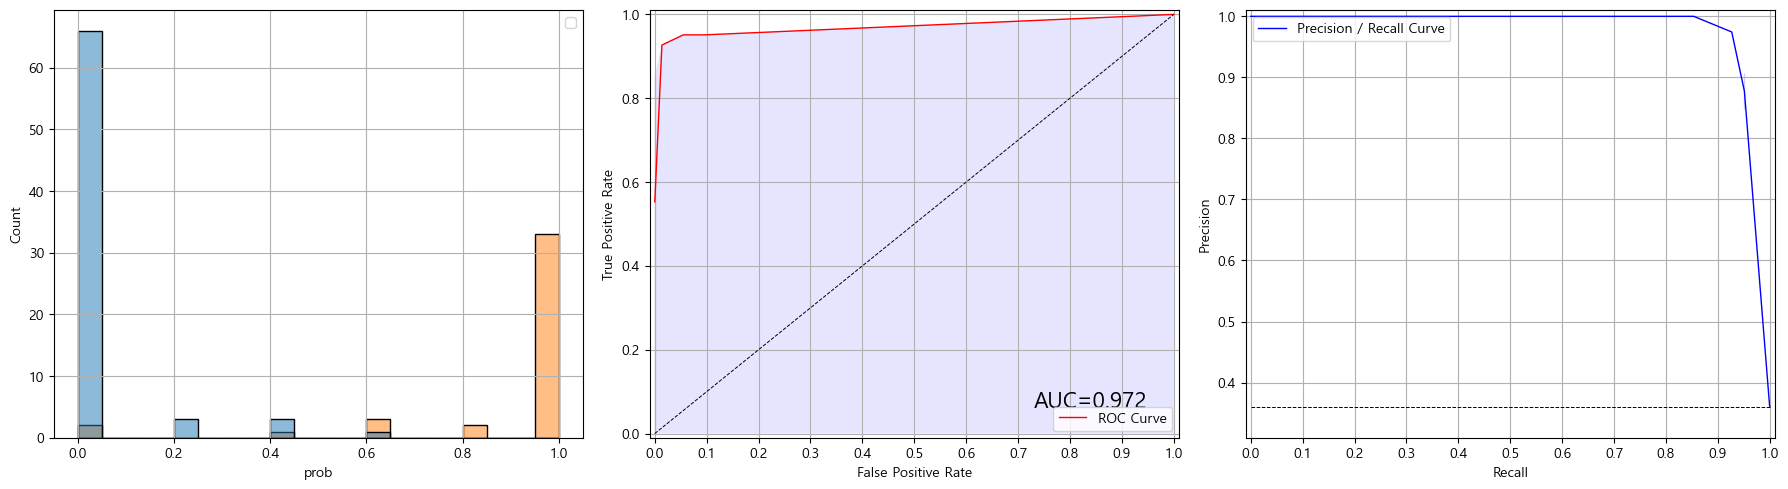


[학습곡선]


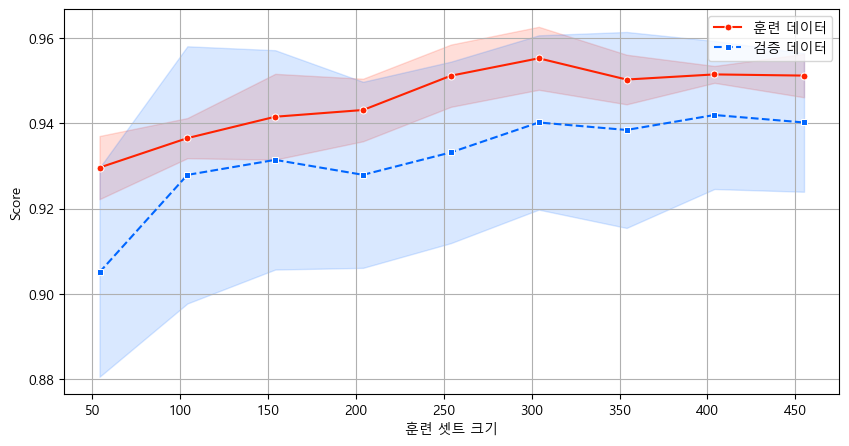

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [6]:
my_knn_classification(x_train1, y_train1, x_test1, y_test1)

> 로지스틱 분석을 수행한 경우 정확도 `99%`, 재현률 `97%` 였으나 KNN은 정확도 `97%`, 재현률 `95%`를 보였다.
>
> 그러므로 이 데이터는 로지스틱 회귀가 KNN보다 더 좋은 성능을 보인다고 할 수 있다.

### [3] 타이타닉 데이터 가져오기

In [7]:
origin2 = my_read_excel("https://data.hossam.kr/edadata/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   category
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   category
 4   Age       1046 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Ticket    1309 non-null   object  
 8   Fare      1308 non-null   float64 
 9   Cabin     295 non-null    object  
 10  Embarked  1307 non-null   category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 87.4+ KB
None

데이터프레임 상위 5개 행
+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|   PassengerId |   Survived |   Pclass | Name                                             

#### (1) 이전과 동일한 전처리

In [8]:
df2 = origin2.copy()
mean_age_df  = origin2[['Survived','Age']].groupby('Survived').mean()
for i in mean_age_df.index:
    mean_age = round(mean_age_df.loc[i]['Age'], 0)
    expr = (df2['Survived'] == i) & (df2['Age'].isna())
    df2.loc[expr, 'Age'] = df2.loc[expr, 'Age'].fillna(mean_age)
df2.loc[ df2['Age'] <= 16, "Age"] = 0
df2.loc[ (df2['Age'] > 16) & (df2['Age'] <= 32), "Age"] = 1
df2.loc[ (df2['Age'] > 32) & (df2['Age'] <= 48), "Age"] = 2
df2.loc[ (df2['Age'] > 48) & (df2['Age'] <= 64), "Age"] = 3
df2.loc[ df2['Age'] > 64, "Age"] = 4
df2['Has_Cabin'] = df2['Cabin'].apply(lambda x:  0 if type(x) == float else 1)
df2['Has_Cabin'].value_counts()
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
df2['IsAlone'] = 0
df2.loc[df2['FamilySize'] == 1, 'IsAlone'] = 1
most_embarked_df = df2[['Survived','Embarked']].groupby('Survived').agg(Series.mode)
for i in most_embarked_df.index:
    most = most_embarked_df.loc[i]['Embarked']
    expr = (df2['Survived'] == i) & (df2['Embarked'].isna())
    df2.loc[expr, 'Embarked'] = df2.loc[expr, 'Embarked'].fillna(most)
mean_fare_df = df2[['Survived','Fare']].groupby('Survived').mean()
for i in mean_fare_df.index:
    mean_fare = mean_fare_df.loc[i]['Fare']
    expr = (df2['Survived'] == i) & (df2['Fare'].isna())
    df2.loc[expr, 'Fare'] = df2.loc[expr, 'Fare'].fillna(mean_fare)
df2['Title'] = df2['Name'].apply(get_title)
df2_1 = my_labelling(df2, 'Title', 'Embarked', 'Sex')
df2_1.loc[ df2_1['Fare'] <= 7.9, "Fare"] = 0
df2_1.loc[ (df2_1['Fare'] > 7.9) & (df2_1['Fare'] <= 14.5), "Fare"] = 1
df2_1.loc[ (df2_1['Fare'] > 14.5) & (df2_1['Fare'] <= 31.3), "Fare"] = 2
df2_1.loc[ df2_1['Fare'] > 31.3, "Fare"] = 3
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df2_2 = df2_1.drop(drop_elements, axis = 1)

df2_2['Title'].unique()

array([2, 3, 1, 0, 4])

#### (2) 데이터 분할

In [9]:
df2_2['Survived'] = df2_2['Survived'].astype('int')
x_train2, x_test2, y_train2, y_test2 = my_train_test_split(df2_2, yname='Survived')
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((1047, 9), (262, 9), (1047,), (262,))

#### (3) KNN분류 알고리즘 적용

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  8 | manhattan |             5 | uniform   |          0.841458 |
| 10 | manhattan |             7 | uniform   |          0.835735 |
|  6 | manhattan |             3 | uniform   |          0.834769 |
|  2 | euclidean |             5 | uniform   |           0.83095 |
| 11 | manhattan |             7 | distance  |          0.829027 |
|  4 | euclidean |             7 | uniform   |          0.828079 |
|  7 | manhattan |             3 | distance  |           0.82807 |
|  9 | manhattan |             5 | distance  |          0.828066 |
|  0 | euclidean |             3 | uniform   |          0.824265 |
|  5 | euclidean |             7 | distance  |          0.824233 |
|  3 | euclidean |             5 | distance  |           0.82329 |
|  1 | euclidean |             3 | distance  |         

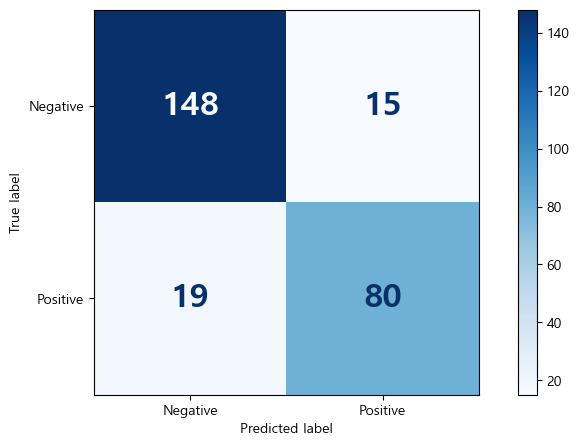


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


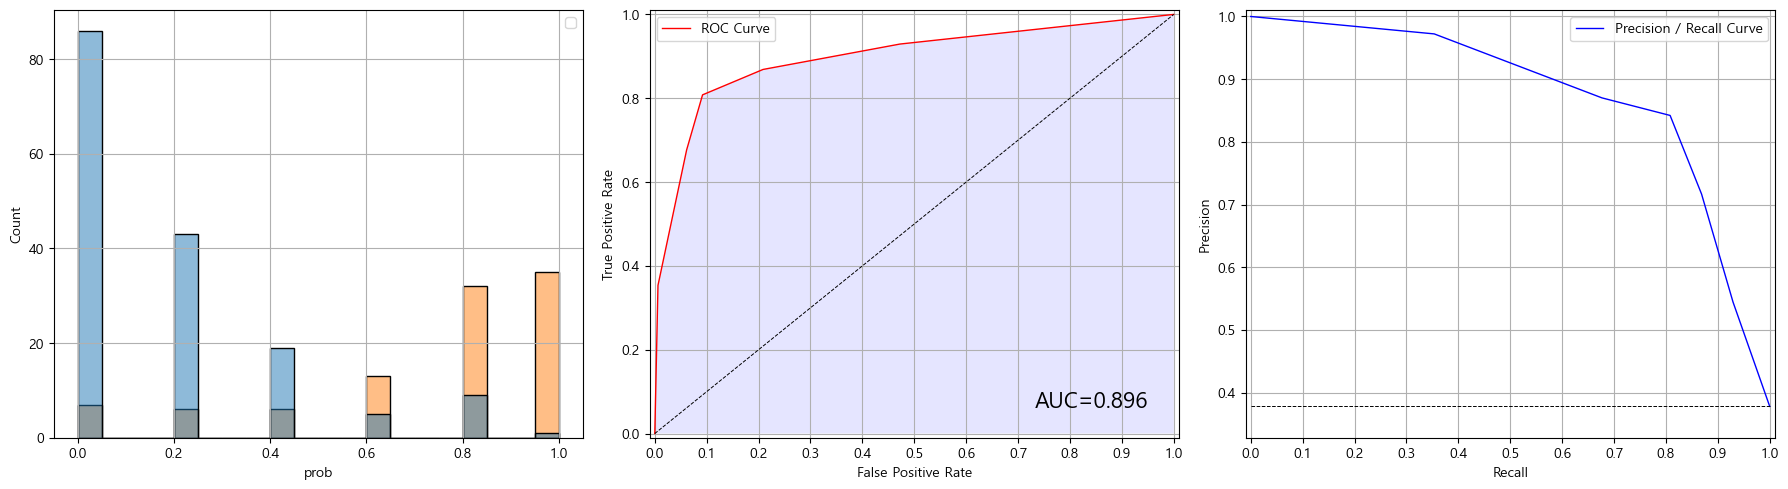


[학습곡선]


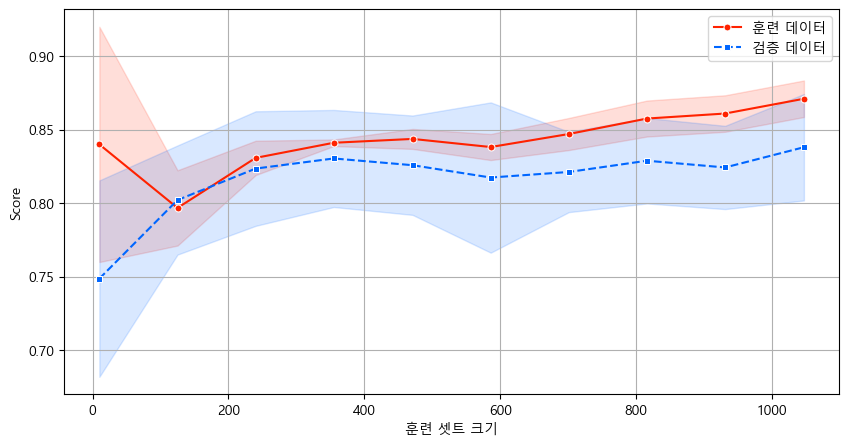

KNeighborsClassifier(metric='manhattan', n_jobs=-1)

In [10]:
my_knn_classification(x_train2, y_train2, x_test2, y_test2)

> 로지스틱 분석의 경우 86.6%의 정확도와 82.7%의 정밀도를 보이는 반면 KNN은 87%의 정확도와 84.2%의 정밀도를 보인다.

> 그러므로 타이타닉 생존률 예측의 경우 KNN 분류가 더 좋은 성능을 보인다.

## 문제 2

아래의 데이터는 사과의 크기, 무게, 단맛, 바삭함, 과즙, 숙성도, 신맛, 품질과 같은 세부 정보를 통해 사과의 품질을 좋음(`good`)과 나쁨(`bad`)로 구분하고 있다.

이 데이터 셋을 활용하여 사과를 상품과 하품으로 분류하기 위한 모형을 로지스틱과 KNN으로 구현하고 더 좋은 성능을 보이는 분류 모형과 성능 평가 지표를 제시하시오.

> https://data.hossam.kr/mldata/apple_quality.xlsx

> https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

| 변수 | 설명 |
|---|---|
| A_id | 각 과일의 고유 식별자 |
| Size | 과일의 크기 |
| Weight | 과일의 무게 |
| Sweetness | 과일의 단맛 정도 |
| Crunchiness | 과일의 아삭함을 나타내는 질감 |
| Juiciness | 과일의 과즙이 풍부한 정도 |
| Ripeness | 과일이 익는 단계 |
| Acidity | 과일의 산도 정도 |
| Quality | 과일의 전반적인 품질 (`good`, `bad`) |


### [1] 데이터 가져오기

In [11]:
origin3 = my_read_data('https://data.hossam.kr/mldata/apple_quality.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None

데이터프레임 상위 5개 행
+----+--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------+
|    |   A_id |      Size |   Weight |   Sweetness |   Crunchiness |   Juiciness |   Ripeness |   Acidity | Quality   |
|----+--------+-----------+----------+-------------+---------------+-------------+------------+-----------+----------

### [2] 데이터 전처리

In [12]:
df3 = origin3.dropna().drop('A_id',axis=1)
df3['Acidity'] = df3['Acidity'].astype('float')
df3_1 = my_labelling(my_standard_scaler(df3, 'Quality'),'Quality')


### [3] 데이터 분할

In [13]:
x_train3, x_test3, y_train3, y_test3 = my_train_test_split(df3_1, yname='Quality')
x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape

((3200, 7), (800, 7), (3200,), (800,))

### [4] 로지스틱 회귀분석

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 13 |    10 |        500 | l2        |          0.752812 |
| 16 |   100 |        500 | l2        |          0.752812 |
| 10 |     1 |        500 | l2        |            0.7525 |
|  7 |   0.1 |        500 | l2        |          0.750625 |
|  4 |  0.01 |        500 | l2        |          0.745313 |
|  1 | 0.001 |        500 | l2        |          0.725938 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.267281 |  

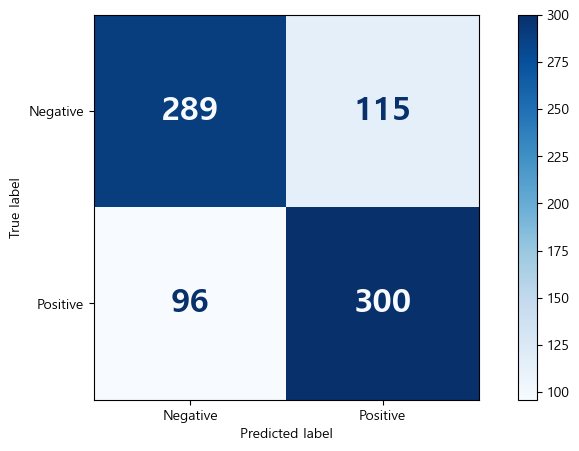


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


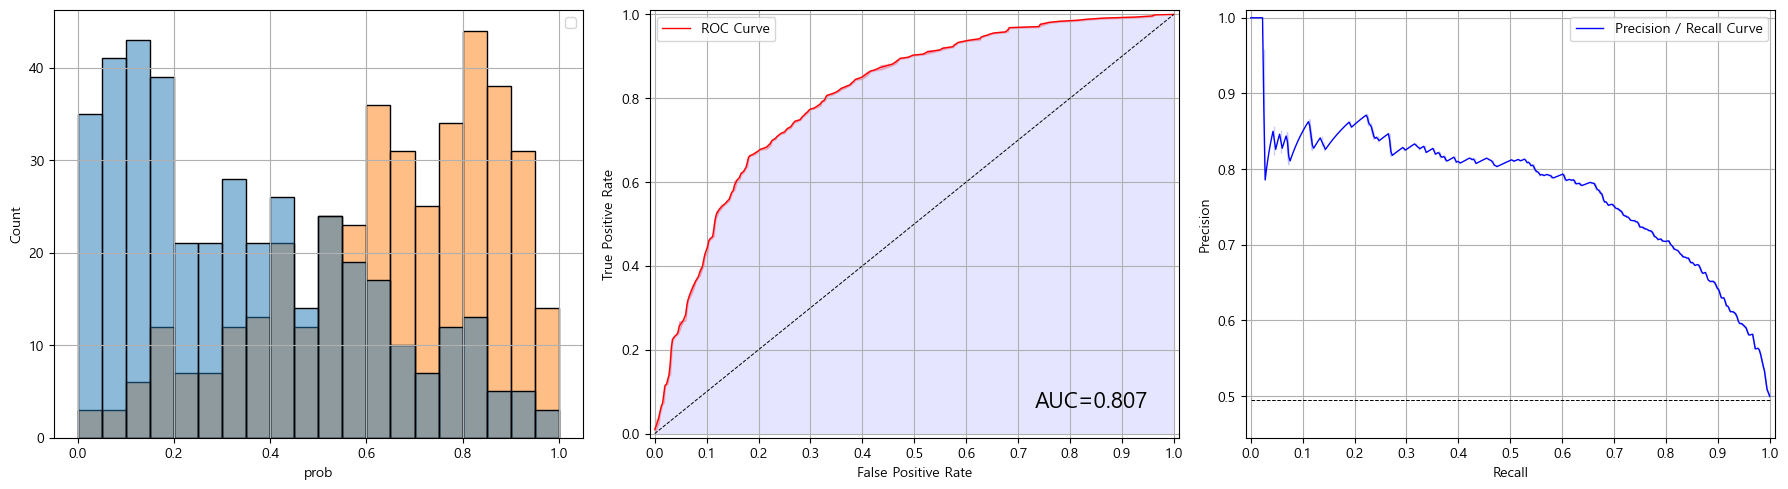


[학습곡선]


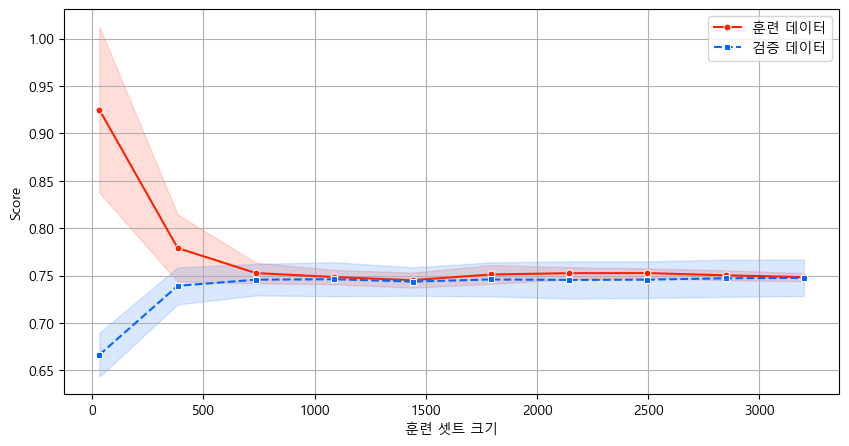

+----+------------+-------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수    |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+-------------+--------------------+------------+---------+------------+---------+------------|
|  5 | Quality    | Ripeness    |            -0.2759 |      0.102 | -2.7031 |      0.007 | 1.47067 |     0.7589 |
|  2 | Quality    | Sweetness   |             1.1555 |      0.121 |  9.5804 |          0 | 1.44135 |     3.1757 |
|  0 | Quality    | Size        |             1.2691 |      0.123 | 10.2933 |          0 | 1.42078 |     3.5578 |
|  1 | Quality    | Weight      |             0.4215 |      0.107 |  3.9353 |          0 | 1.41257 |     1.5242 |
|  3 | Quality    | Crunchiness |             0.0396 |      0.096 |  0.4138 |      0.679 | 1.24928 |     1.0404 |
|  4 | Quality    | Juiciness   |             0.8387 |      0.106 |  7.9025 |          0 | 1.23833 |     2.313

LogisticRegression(C=10, max_iter=500, n_jobs=-1)

In [14]:
my_logistic_classification(x_train3, y_train3, x_test3, y_test3)

### [5] KNN 

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  4 | euclidean |             7 | uniform   |          0.900938 |
|  5 | euclidean |             7 | distance  |          0.900625 |
|  2 | euclidean |             5 | uniform   |           0.89375 |
|  3 | euclidean |             5 | distance  |           0.89375 |
| 11 | manhattan |             7 | distance  |          0.892188 |
| 10 | manhattan |             7 | uniform   |          0.891563 |
|  0 | euclidean |             3 | uniform   |          0.889687 |
|  1 | euclidean |             3 | distance  |          0.889687 |
|  9 | manhattan |             5 | distance  |           0.88875 |
|  8 | manhattan |             5 | uniform   |          0.888125 |
|  7 | manhattan |             3 | distance  |          0.883125 |
|  6 | manhattan |             3 | uniform   |         

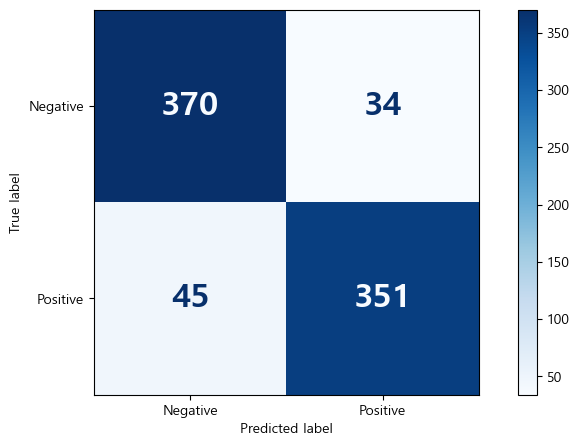


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


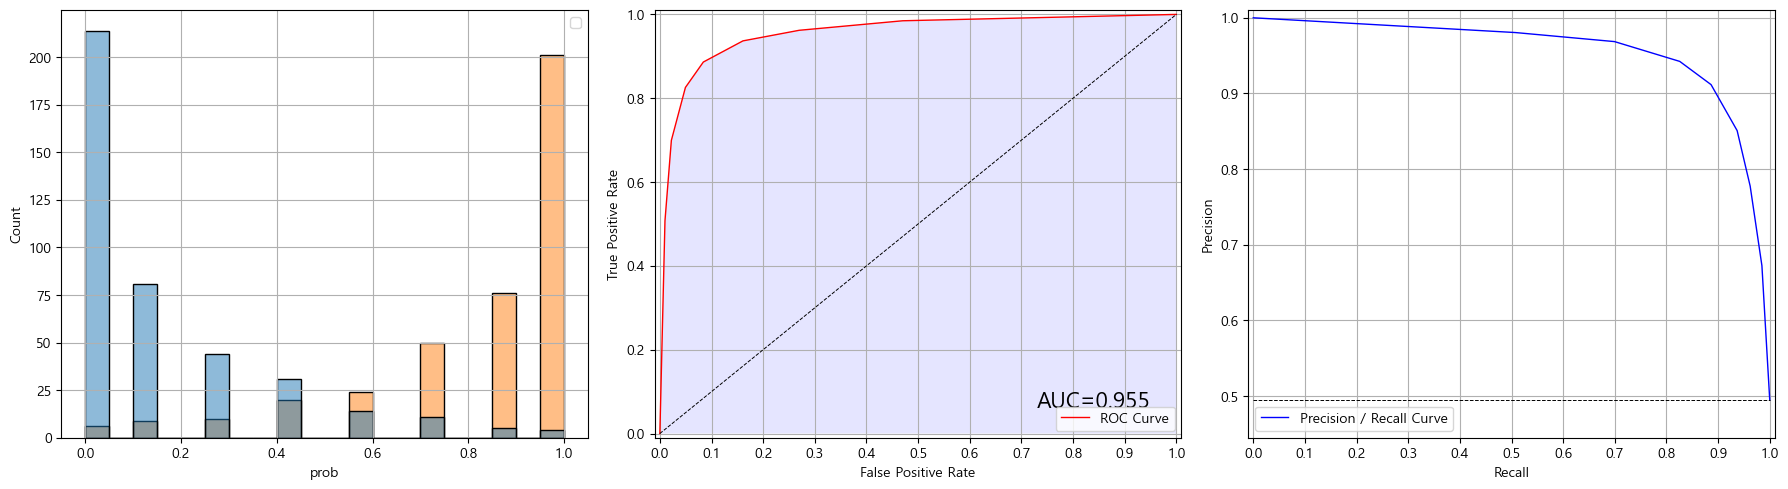


[학습곡선]


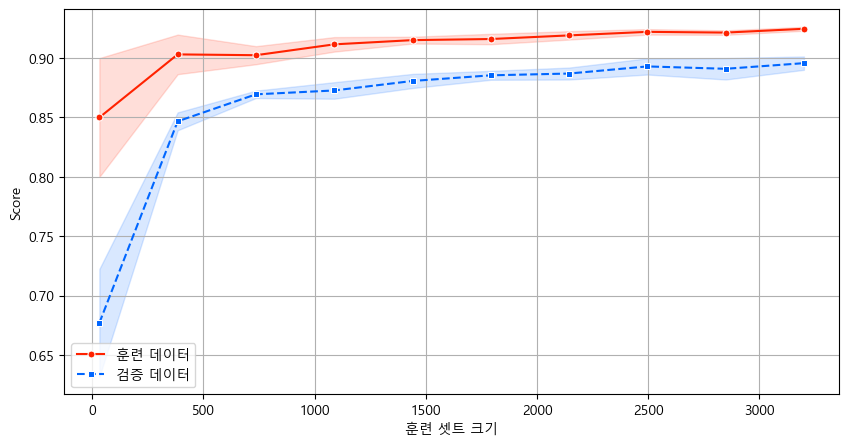

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7)

In [15]:
my_knn_classification(x_train3, y_train3, x_test3, y_test3)

> 로지스틱 분석의 경우 73.6%의 정확도와 72.3%의 정밀도를 보이는 반면 KNN은 90.1%의 정확도와 91.2%의 정밀도를 보인다.

> 그러므로 사과의 품질 예측의 경우 KNN 분류가 더 좋은 성능을 보인다.



## 문제 3

아래의 데이터는 흡연 여부에 따른 다양한 검사결과 수치이다. 이 데이터를 토대로 흡연 여부를 판별할 수 있는 분류 모형을 로지스틱 회귀와 KNN 분류 모형으로 구현하고 더 좋은 성능을 보이는 분류 모형과 성능 평가 지표를 제시하시오.

> https://data.hossam.kr/mldata/smoker_status.xlsx

> https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction

| 필드명 | 설명  |
|---|---|
| id | 고유 식별 번호 |
| age | 나이 |
| height(cm) | 키 |
| weight(kg) | 몸무게 |
| waist(cm) | 허리둘레 |
| eyesight(left) | 시력(왼쪽) |
| eyesight(right) | 시력(오른쪽) |
| hearing(left) | 청력(왼쪽) |
| hearing(right) | 청력(오른쪽) |
| systolic | 수축기 혈압(mmHg 단위) |
| relaxation | 휴식 혈압(mmHg 단위) |
| fasting blood sugar | 공복 혈당 수치(mg/dL 단위) |
| Cholesterol | 콜레스테롤 수치(mg/dL 단위) |
| triglyceride | 중성지방 수치(mg/dL 단위) |
| HDL | 고밀도 지단백 수치 (mg/dL) |
| LDL | 저밀도 지단백 수치 (mg/dL) |
| hemoglobin | 헤모글로빈 수치(g/dL) |
| Urine protein | 소변내 단백질 수준 |
| serum creatinine | 혈청 크레아티닌 수치(mg/dL) |
| AST | 아스파르트 아미노전이효소(AST) 수준 |
| ALT | 알라닌아미노 전이효소 수준 |
| Gtp | 감마-글루타밀 전이효소 수준 |
| dental caries | 1인당 치아우식증 유무를 나타내는 값(0: 없음, 1: 있음) |
| smoking | 흡연상태(0: 비흡연자, 1: 흡연자) |

### [1] 데이터 가져오기

In [16]:
origin4 = my_read_data('https://data.hossam.kr/mldata/smoker_status.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

### [2] 데이터 전처리

In [18]:
df4 = origin4.copy()
df4['age'] = df4['age'].apply(lambda x: x//10)
df4['height(cm)'] = df4['height(cm)'].apply(lambda x: (x//10) * 10)
df4['weight(kg)'] = df4['weight(kg)'].apply(lambda x: (x//10) * 10)
df4['anisopia'] = (df4['eyesight(left)'] - df4['eyesight(right)']).apply(lambda x: abs(x) <0.2)
A = list(df4['eyesight(left)'])
for i,v in enumerate(A):
    A[i] = max(v,df4['eyesight(right)'][i])
df4['eye_lvl'] = A
df4.drop(['eyesight(left)','eyesight(right)'],inplace=True)


KeyError: "['eyesight(left)', 'eyesight(right)'] not found in axis"

### [3] 데이터 분할

In [ ]:
x_train4, x_test4, y_train4, y_test4 = my_train_test_split(df4, 'smoking')
x_train4.shape, x_test4.shape, y_train4.shape, y_test4.shape


NameError: name 'my_train_test_split' is not defined

In [ ]:
x_train4_1, x_test4_1, y_train4_1, y_test4_1 = my_train_test_split(my_standard_scaler(origin4,'smoking'), 'smoking')
x_train4_1.shape, x_test4_1.shape, y_train4_1.shape, y_test4_1.shape

((127404, 22), (31852, 22), (127404,), (31852,))

### [3] 로지스틱 회귀분석

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
|  4 |  0.01 |        500 | l2        |          0.749097 |
|  7 |   0.1 |        500 | l2        |          0.749082 |
| 10 |     1 |        500 | l2        |          0.749074 |
| 13 |    10 |        500 | l2        |          0.749066 |
| 16 |   100 |        500 | l2        |          0.749066 |
|  1 | 0.001 |        500 | l2        |          0.747732 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.283364 |  

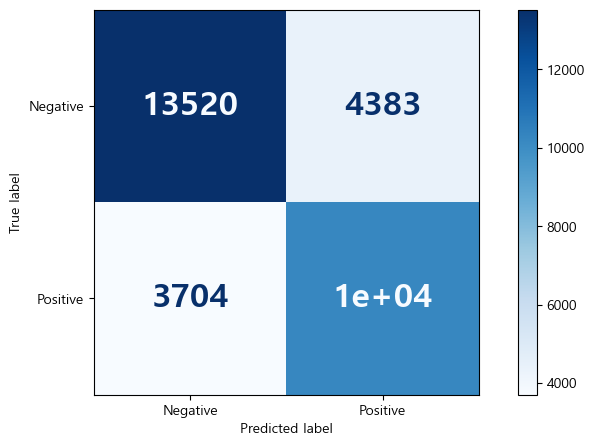


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


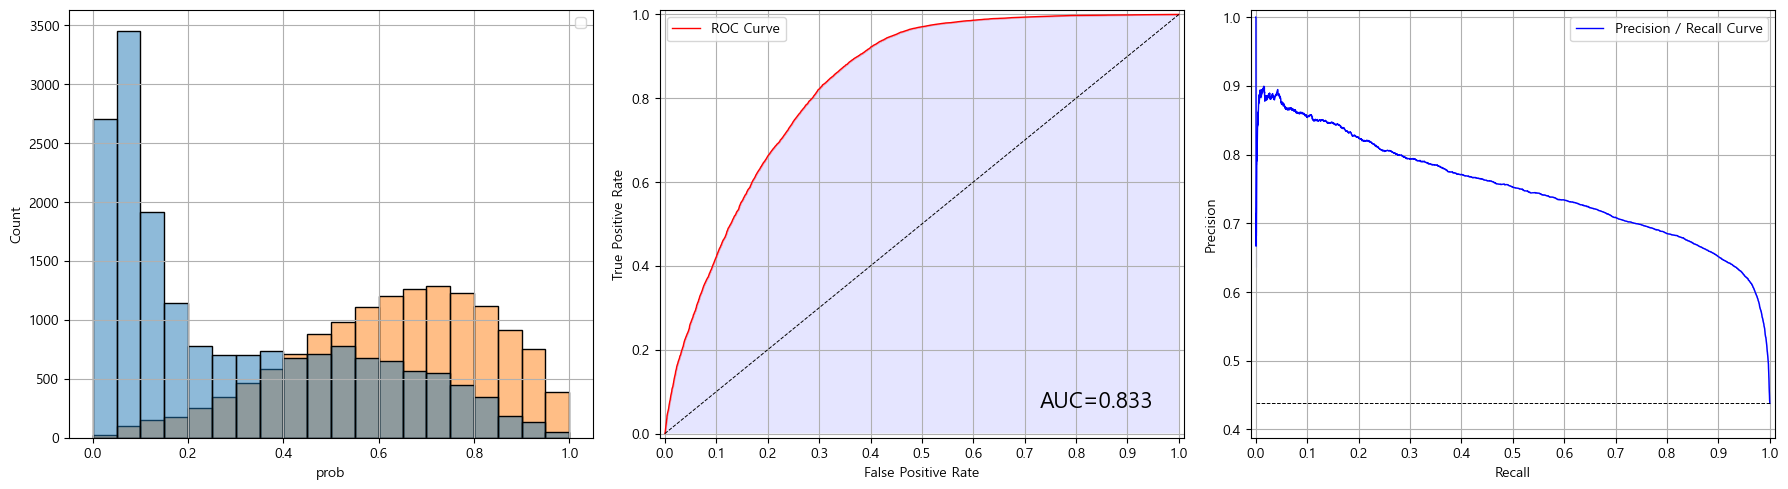


[학습곡선]


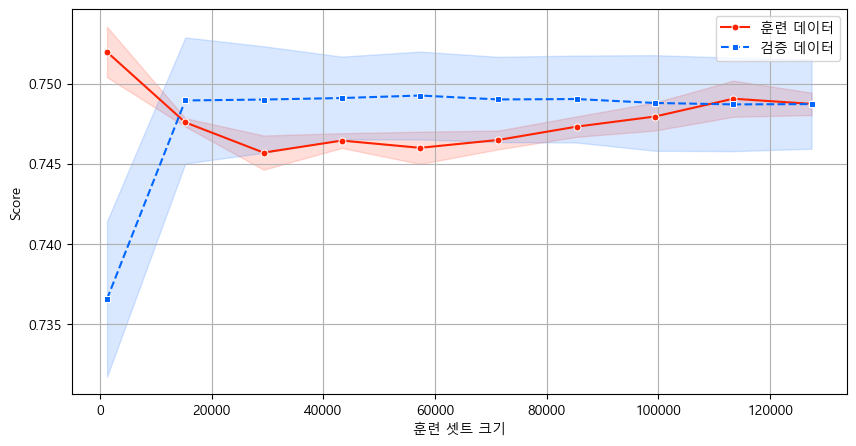

+----+------------+---------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수            |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+---------------------+--------------------+------------+---------+------------+---------+------------|
| 11 | smoking    | Cholesterol         |            -0.1754 |      0.048 | -3.6412 |          0 | 8.76797 |     0.8391 |
| 14 | smoking    | LDL                 |            -0.0757 |      0.046 | -1.6626 |      0.096 |  7.2819 |     0.9271 |
|  2 | smoking    | weight(kg)          |            -0.2797 |      0.036 | -7.7945 |          0 | 6.72606 |      0.756 |
|  3 | smoking    | waist(cm)           |             0.0669 |       0.03 |  2.1942 |      0.028 | 4.54277 |     1.0692 |
| 13 | smoking    | HDL                 |            -0.1057 |      0.029 | -3.5923 |          0 | 3.54928 |     0.8997 |
| 12 | smoking    | triglyceride        |     

LogisticRegression(C=0.01, max_iter=500, n_jobs=-1)

In [ ]:
my_logistic_classification(x_train4_1, y_train4_1, x_test4_1, y_test4_1,hist=False,roc=False,pr=False)

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 10 |     1 |        500 | l2        |          0.740346 |
| 16 |   100 |        500 | l2        |          0.739851 |
|  1 | 0.001 |        500 | l2        |          0.739208 |
| 13 |    10 |        500 | l2        |          0.739106 |
|  7 |   0.1 |        500 | l2        |          0.739098 |
|  4 |  0.01 |        500 | l2        |          0.739058 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.245012 |  

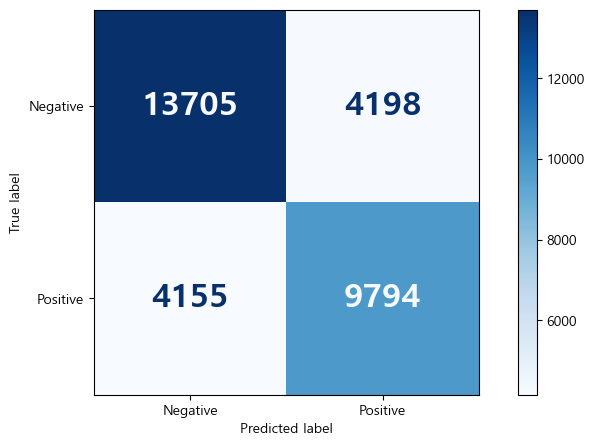


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


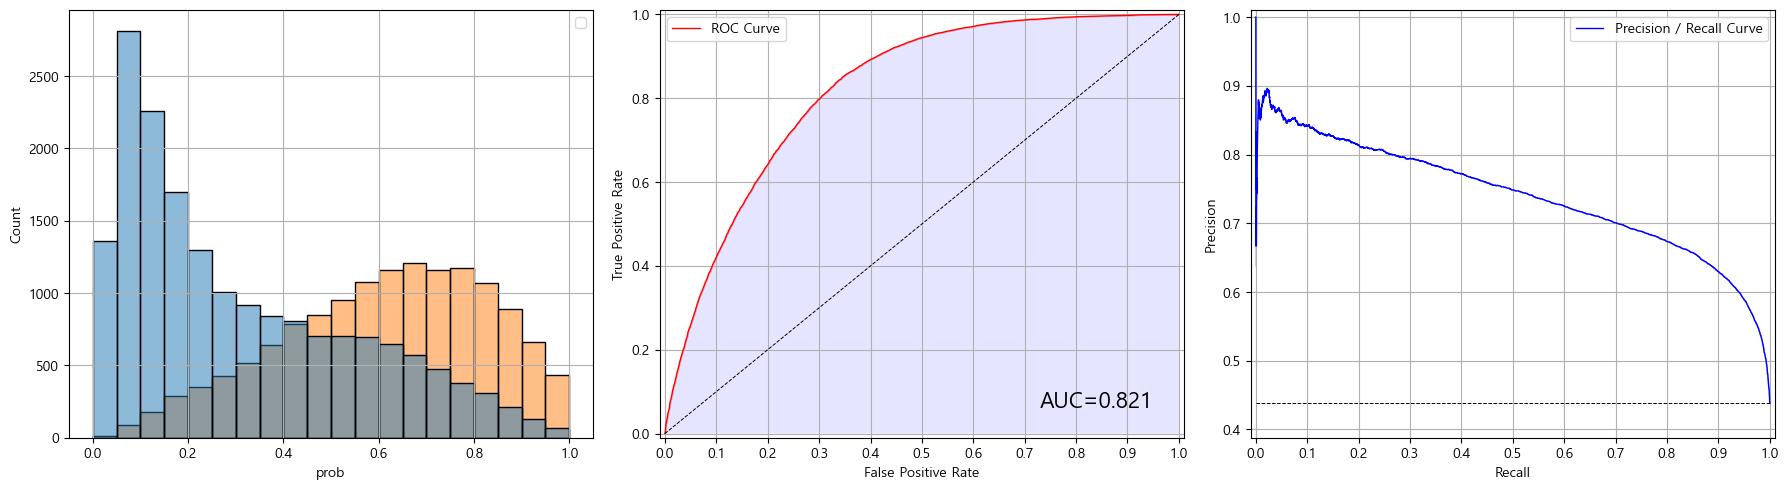


[학습곡선]


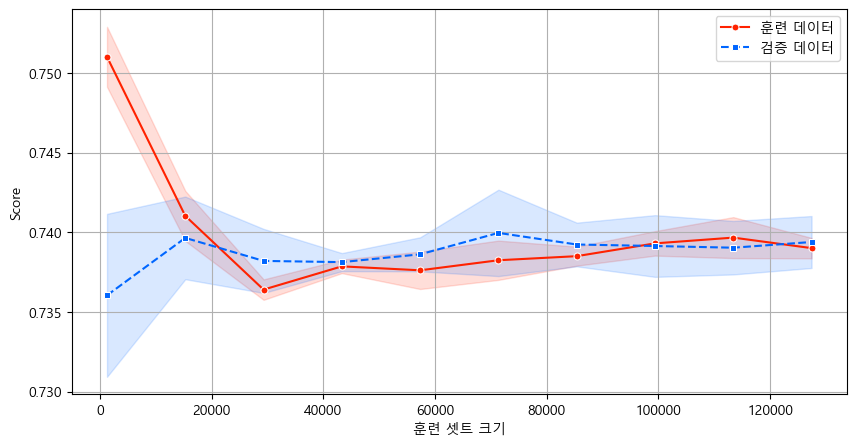

+----+------------+---------------------+--------------------+------------+----------+------------+---------+------------+
|    | 종속변수   | 독립변수            |   B(비표준화 계수) |   표준오차 |        t |   유의확률 |     VIF |   OddsRate |
|----+------------+---------------------+--------------------+------------+----------+------------+---------+------------|
| 11 | smoking    | Cholesterol         |            -0.0084 |      0.003 |  -3.2934 |      0.001 | 423.695 |     0.9916 |
|  1 | smoking    | height(cm)          |             0.0034 |      0.003 |   1.2745 |      0.202 | 382.334 |     1.0034 |
|  3 | smoking    | waist(cm)           |            -0.0515 |      0.003 | -15.3243 |          0 | 328.196 |     0.9498 |
|  8 | smoking    | systolic            |            -0.0193 |      0.002 | -11.2653 |          0 | 229.954 |     0.9809 |
| 15 | smoking    | hemoglobin          |             0.4481 |      0.014 |   31.333 |          0 | 203.287 |     1.5654 |
|  9 | smoking    | relaxation        

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [ ]:
my_logistic_classification(x_train4, y_train4, x_test4, y_test4,hist=False,roc=False,pr=False)

### [4] KNN 

In [ ]:
my_knn_classification(x_train4_1, y_train4_1, x_test4_1, y_test4_1,hist=False,roc=False,pr=False)

KeyboardInterrupt: 

In [ ]:
my_knn_classification(x_train4, y_train4, x_test4, y_test4,hist=False,roc=False,pr=False)

## 문제 4

한 자동차 회사는 기존 제품(P1, P2, P3, P4, P5)으로 새로운 시장에 진출할 계획을 갖고 있습니다. 집중적인 시장 조사 후에 그들은 새로운 시장의 양상이 기존 시장과 유사하다는 것을 추론했습니다.

기존 시장에서 영업팀은 모든 고객을 4개 그룹(A, B, C, D)으로 분류했습니다. 그런 다음 다양한 고객 그룹을 대상으로 세분화된 지원 및 커뮤니케이션을 수행했습니다. 이 전략은 그들에게 매우 효과적이었습니다. 그들은 새로운 시장에 동일한 전략을 사용할 계획이며 2627명의 새로운 잠재 고객을 식별했습니다.

이를 활용하여 새로운 고객이 어떤 그룹에 속할지 예측한다면 그에 따른 세일즈 전략을 세울 수 있습니다.

주어진 데이터를 통해 고객이 4개 그룹중 어떤 그룹에 속하는지 예측할 수 있는 모형을 로지스틱 모형과 KNN모형으로 구현하고 더 성능이 좋은 모델과 성능 평가 지표를 제시하시오.

또한 자신에 대한 가상의 정보를 주입하여 자신이 어떤 그룹에 속할지 예측하시오.

> https://data.hossam.kr/mldata/customer_segmentation.xlsx

> https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

| 변수 | 설명 |
|---|---|
| ID | 고유 ID |
| Gender | 고객의 성별 |
| Ever_Married | 고객의 결혼 상태 |
| Age | 고객의 연령 |
| Graduated | 고객이 졸업생인가요? |
| Profession | 고객의 직업 |
| Work_Experience | 수년간의 업무 경험 |
| Spending_Score | 고객의 지출 점수 |
| Family_Size | 고객의 가족 수(고객 포함) |
| Var_1 | 고객의 익명 카테고리 |
| Segmentation | (목적변수) 고객 분류 |

### [1] 데이터 가져오기

In [3]:
origin5 = my_read_data('https://data.hossam.kr/mldata/customer_segmentation.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB
None

데이터프레임 상위 5개 행
+----+--------+----------+----------------+-------+-------------+---------------+-------------------+------------------+---------------+---------+----------------+
|    |     ID | Gender   | Ever_Married   | 

### [2] 데이터 전처리

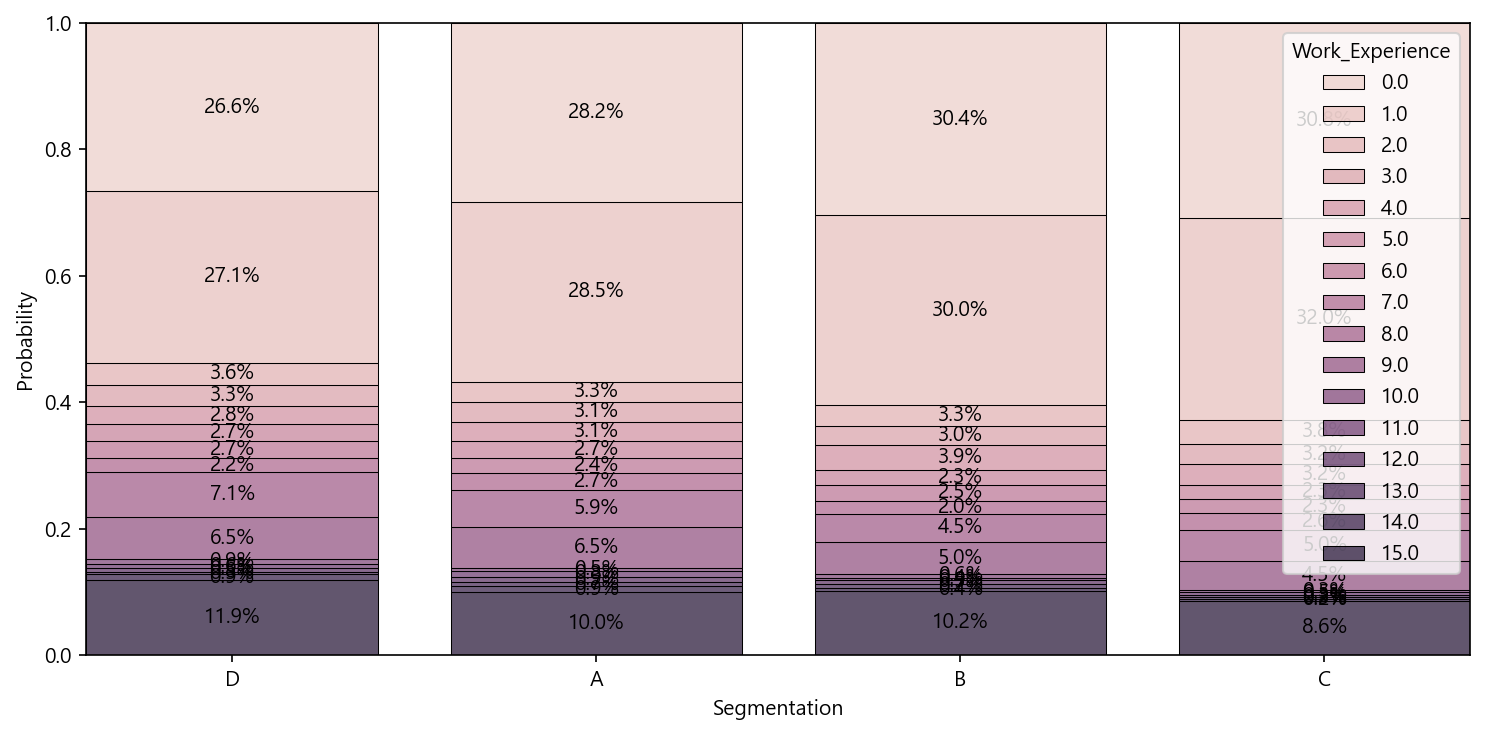

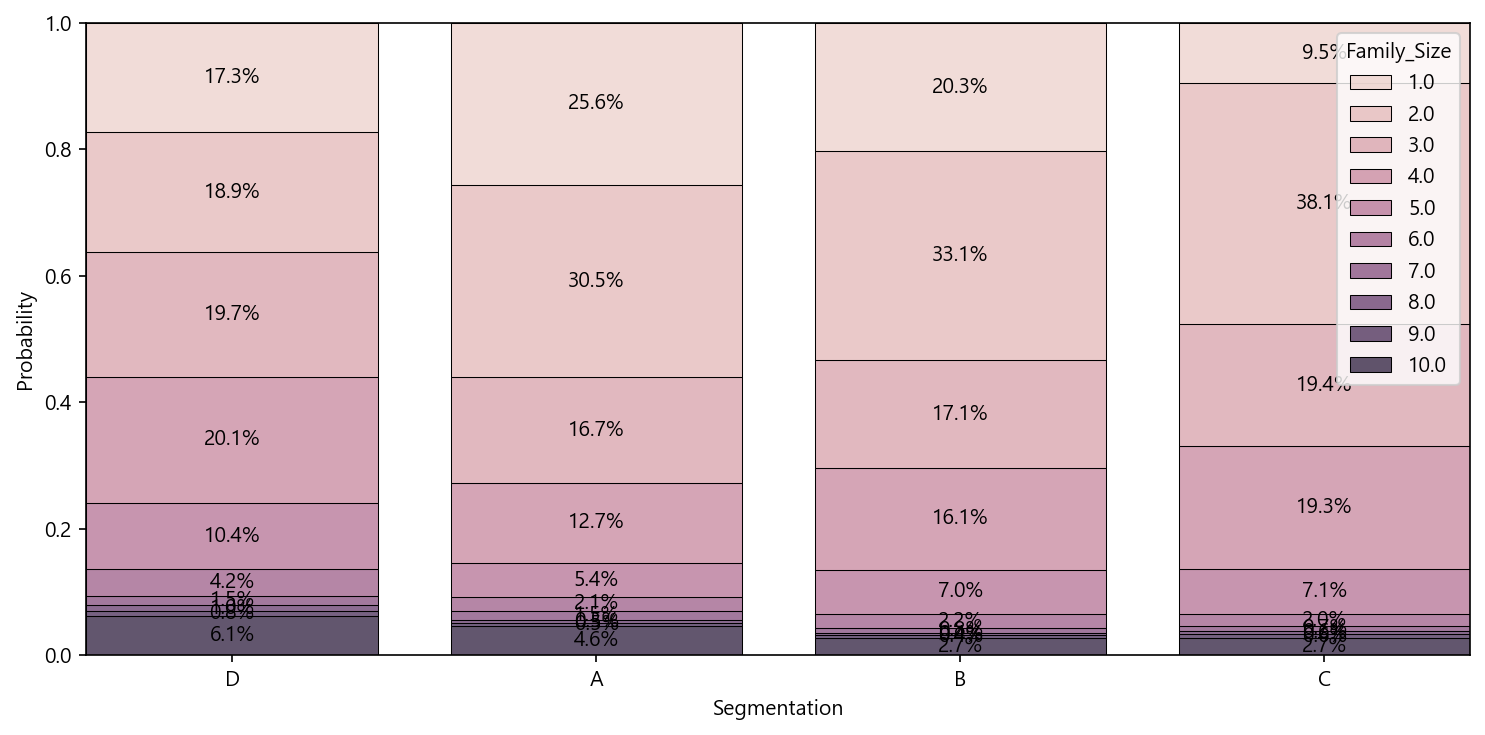

In [25]:
df5 = origin5.copy()
df5['Work_Experience'] = my_replace_missing_value(df5[['Work_Experience']], strategy='constant', fill_value=15)['Work_Experience']
df5['Family_Size'] = my_replace_missing_value(df5[['Family_Size']], strategy='constant', fill_value=10)['Family_Size']
my_stackplot(df = df5,xname = 'Segmentation', hue = 'Work_Experience')
my_stackplot(df = df5,xname = 'Segmentation', hue = 'Family_Size')

